# 3.6 Lab: Linear Regression

## 3.6.1 Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# in Python, module can be imported by a command similar to 'import numpy as np'. 
# it is a good practice to maintain a section at the beginning of the notebook to import all necessary modules.
# for new module, could use pip to install it. 
# for example 'pip install numpy'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from patsy import dmatrices

import seaborn as sns
sns.set_theme()
sns.set_style("ticks")

In [3]:
# since in Python, there is no default MASS module and Boston dataset, I will read in the Boston dataset from CSV. The data is in the ./data folder.
Boston = pd.read_csv('https://raw.githubusercontent.com/tvanzyl/Sharing_ISL_python/master/data/Boston.csv', header=0)

## 3.6.2 Simple Linear Regression

The `ISLR2` library contains the `Boston`  data set, which
records `medv` (median house value) for $506$ census tracts in Boston. We will seek to predict `medv` using $12$ predictors such as `rmvar` (average number of  rooms per house), `age` (average age of houses), and `lstat` (percent of households with low socioeconomic status).

In [4]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


To find out more about the data set, we can type `Boston.describe()`.

In [5]:
Boston.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We will start by using the `ols()` function to fit a simple  linear regression model, with `medv` as the response and `lstat`  as the predictor. The basic syntax is `ols("y ~ x", data)`, where `y` is the response, `x` is the predictor, and `data` is the data set in which these two variables are kept.

In [6]:
# to have similar formula notation as R, use the following import. 
# One thing to note is that the ' ' for the formula part in fitting step and the '.fit()' at the end.
# import statsmodels.formula.api as smf, we would use smf to call the model. Of course, there are other ways to run linear regression in pythin, such as sklearn.
lm = smf.ols('medv ~ lstat', data=Boston).fit()

If we type `lm.params`,  some basic information about the model is output. For more detailed information, we use `lm.summary()`. This gives us $p$-values and standard errors for the coefficients, as well as the $R^2$ statistic and $F$-statistic for the model.


In [7]:
lm.params

Intercept    34.553841
lstat        -0.950049
dtype: float64

In [8]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           5.08e-88
Time:                        19:18:43   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [9]:
# use dir() to get a list of all the attributes an object has
dir(lm)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [10]:
# we can try a few 
print(lm.params)

Intercept    34.553841
lstat        -0.950049
dtype: float64


In order to obtain a confidence interval for the coefficient estimates, we can use the `conf_int()` command. %Type `lm.conf_int()` at the command line to obtain the confidence intervals.

In [11]:
print(lm.conf_int())

                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


The `predict()` function can be used to produce confidence intervals and prediction intervals for the prediction of `medv` for a given value of `lstat`.

In [12]:
# provide prediction for 3 observations
lm.predict(pd.DataFrame({'lstat':[5, 10, 15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [13]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


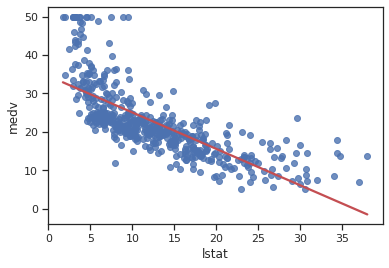

In [14]:
sns.regplot(x="lstat", y="medv", data=Boston, ci=None, line_kws={"color": "r"});

There is some evidence for non-linearity in the relationship between `lstat` and `medv`. We will explore this issue  later in this lab.

The `regplot()` function can be used to draw any line, not just the least squares regression line.
Below we experiment with some additional settings for plotting lines and points.
The `line_kws={"lw":3}` command causes the width of the regression line to be increased by a factor of 3;  We can also use the `marker` option to create different plotting symbols.

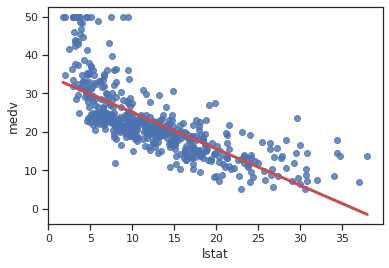

In [15]:
sns.regplot(x="lstat", y="medv", data=Boston, ci=None, line_kws={"lw":3, "color": "r"});

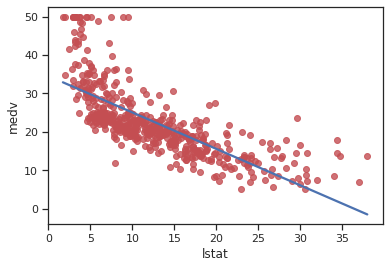

In [16]:
sns.regplot(x="lstat", y="medv", data=Boston, ci=None, scatter_kws={"color": "r"});

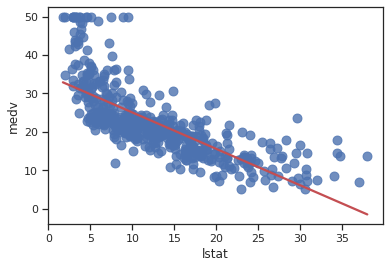

In [17]:
sns.regplot(x="lstat", y="medv", data=Boston, ci=None, line_kws={"color": "r"}, scatter_kws={"s": 80});

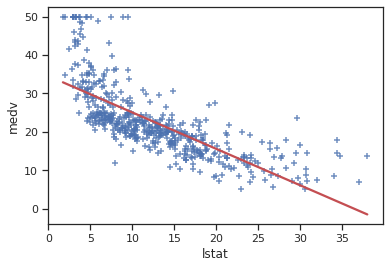

In [18]:
sns.regplot(x="lstat", y="medv", data=Boston, ci=None, marker="+", line_kws={"color": "r"});

In [19]:
# the statistics of the linear regression mostly stored in lm.get_influence(), for example, the cookdistances, leverage.
dir(lm.get_influence())
# for example, the following identifies the observation with the largest leverage 
np.argmax(lm.get_influence().hat_matrix_diag)

374

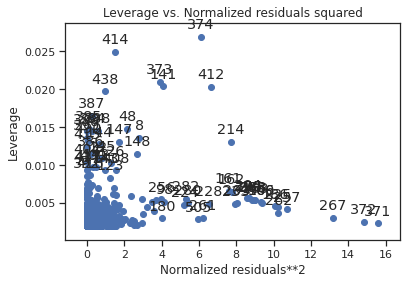

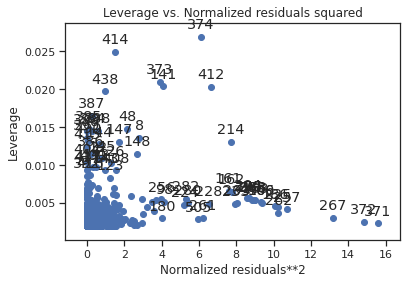

In [20]:
# from statsmodels.graphics.regressionplots import * just as a reference
plot_leverage_resid2(lm)

In [21]:
# as mentioned above. For machine learning models, sklearn is the most common used module, but sklearn is a little bit less on statistics.
x = pd.DataFrame(Boston.lstat)
y = Boston.medv
print(x.shape)

model = linear_model.LinearRegression()
model.fit(x, y)
print(model.intercept_)
print(model.coef_)

(506, 1)
34.55384087938311
[-0.95004935]


## 3.6.3 Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we again use the `ols()` function. The syntax `ols("y ~ x1 + x2 + x3")` is used to fit a model with three predictors, `x1`, `x2`, and `x3`.
The `summary()` function now outputs the regression coefficients for all the predictors.

In [22]:
# we can still use smg.ols to run multiple linear regression.
lm = smf.ols('medv ~ lstat + age', data = Boston).fit()

In [23]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           2.98e-88
Time:                        19:18:47   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

The `Boston` data set contains 12 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors.
Instead, we can use the following short-hand:

In [24]:
# if we want to use all the variable. We can use the following trick to manually construct the list. In Python, most of time, you have to manully construct the variable list.
all_columns = "+".join(Boston.columns.difference(["medv"]))
my_formula = "medv~" + all_columns
lm = smf.ols(my_formula, data=Boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.72e-135
Time:                        19:18:47   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

We can access the individual components of a summary table by name
Hence `lm.summary().tables[0]` gives us the top, and `lm.summary().tables[1]` gives us the bottom. 

unlike R, Python is not fully up speeded to all the statistics. If you want to have the VIF of the variables in LM, you have to code a little bit.
```
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
```

In [25]:
y, X = dmatrices(my_formula, data=Boston, return_type='dataframe')
vif_coeff = {}
for i in range(X.shape[1]):
    vif_coeff[X.columns[i]] = variance_inflation_factor(np.array(X.dropna()),i)
    
print(vif_coeff)

{'Intercept': 585.2652379423121, 'age': 3.1008255128153372, 'black': 1.3485210764063755, 'chas': 1.0739953275537883, 'crim': 1.7921915474332413, 'dis': 3.955944906372728, 'indus': 3.9915964183460333, 'lstat': 2.9414910780919348, 'nox': 4.393719847577495, 'ptratio': 1.7990840492488973, 'rad': 7.484496335274478, 'rm': 1.9337444357832563, 'tax': 9.00855394759707, 'zn': 2.298758178749441}


## 3.6.4 Interaction Terms

It is easy to include interaction terms in a linear model using the `ols()` function. The syntax `lstat*black` tells `statsmodels` to include an interaction term between `lstat` and `black`.
The syntax `lstat * age` simultaneously includes `lstat`, `age`, and the interaction term `lstat`$\times$`age` as predictors; it is a shorthand for `lstat + age + lstat:age`.
  %We can also pass in transformed versions of the predictors.

In [26]:
# we use * to add interaction terms
lm = smf.ols('medv~lstat*age', data=Boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           4.86e-88
Time:                        19:18:47   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## 3.6.5 Non-linear Transformations of the Predictors 

The `ols()` function can also accommodate non-linear transformations of the predictors. For instance, given a predictor $X$, we can create a predictor $X^2$ using
 `I(X**2)`. The function `I()` is needed since the `**` has a special meaning in a formula object; wrapping as we do allows the standard usage in `python`, which is to raise `X` to the power `2`. We now
perform a regression of `medv` onto `lstat` and `lstat**2`.

In [27]:
lm_order1 = smf.ols('medv~ lstat', data=Boston).fit()
lm_order2 = smf.ols('medv~ lstat+ I(lstat ** 2.0)', data=Boston).fit()
print(lm_order2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.56e-112
Time:                        19:18:47   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          42.8620      0.872     

The near-zero $p$-value associated with the quadratic term suggests that it leads to an improved model.
We will use the `anova_lm()` function  to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [28]:
# there is anova function built in already in statsmodels.  
# if you know what to do, use the key words to google it and likely you will find a very good answer. 
# here we compare the models with one order of stat and two orders of stats. 
# by looking at the p value that will reject the null hypothesis that the coefficent of lstat**2 equals 0.
table = sm.stats.anova_lm(lm_order1, lm_order2)
table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictor, `lstat`, while Model 2 corresponds to the larger quadratic model that has two predictors, `lstat` and `lstat^2`.
The `lm_anova()` function performs a hypothesis test
comparing the two models. The null hypothesis is that the two models fit the data equally well,  and the alternative hypothesis is that the full model is superior. Here the $F$-statistic is $135$
 and the associated $p$-value is virtually zero. This provides very clear evidence that the model containing the predictors `lstat` and `lstat**2` is far superior to the model that only contains the predictor `lstat`.
 This is not surprising, since earlier we saw evidence for non-linearity in the relationship between `medv` and `lstat`. If we look

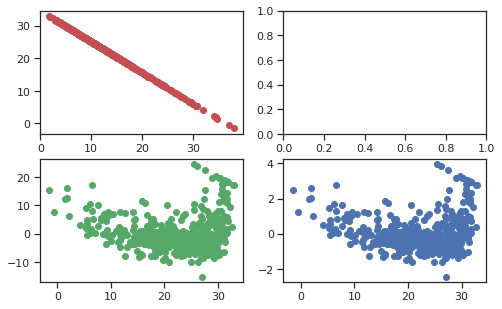

In [29]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(8,5))
ax1.plot(Boston.lstat, lm_order1.predict(),'ro')
ax3.plot(lm_order1.predict(), lm_order1.resid, 'go')
ax4.plot(lm_order1.predict(), lm_order1.resid_pearson, 'bo')
plt.show()

if we added in the second order `lstat**2`, we can see the residues are more random

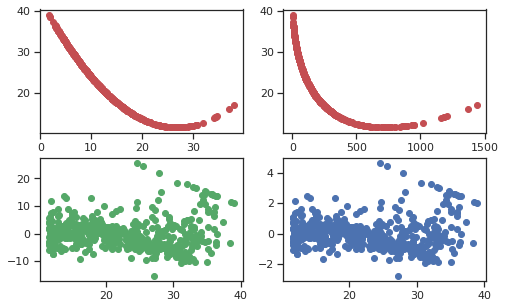

In [30]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(8,5))
ax1.plot(Boston.lstat,  lm_order2.predict(),'ro')
ax2.plot(Boston.lstat ** 2.0,  lm_order2.predict(),'ro')
ax3.plot(lm_order2.predict(), lm_order2.resid, 'go')
ax4.plot(lm_order2.predict(), lm_order2.resid_pearson, 'bo')
plt.show()

In order to create a cubic fit, we can include a predictor of the form `I(X**3)`. For example, the following command produces a fifth-order polynomial fit:

In [31]:

lm_5 = smf.ols('medv~ lstat + I(lstat**2) + I(lstat**3) + I(lstat**4) + I(lstat**5)', data=Boston).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          8.73e-122
Time:                        19:18:49   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783

This suggests that including additional  polynomial terms, up to fifth order, leads to an improvement in the model fit! However, further investigation of the data reveals that no polynomial terms beyond fifth order have significant $p$-values
in a regression fit.

Of course, we are in no way restricted to using polynomial transformations of the predictors. Here we try a log transformation.

In [32]:
lm_log = smf.ols('medv~ np.log(rm)', data=Boston).fit()
print(lm_log.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.22e-64
Time:                        19:18:49   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

## 3.6.6 Qualitative Predictors 

We will now examine the `Carseats` data, which is part of the
`ISLR2` library. We will  attempt to predict `Sales`
(child car seat sales) in $400$ locations based on a number of
predictors.

I prepared the Carseats file from .Rdata. And it is saved under the data folder.  Let us load them in and explore this dataset.

In [33]:
Carseats = pd.read_csv('https://raw.githubusercontent.com/tvanzyl/Sharing_ISL_python/master/data/Carseats.csv', header=0)

In [34]:
list(Carseats)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [35]:
Carseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [36]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


The `Carseats` data includes qualitative predictors such as `shelveloc`, an indicator of the quality of the shelving location---that is, the  space within a store in which the car seat is displayed---at each location. The predictor `shelveloc` takes on three possible values:  *Bad*, *Medium*, and *Good*. Given a qualitative variable such as `shelveloc`, `python` generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [37]:
lm_carseats = smf.ols('Sales ~ Income + Advertising + Price + Age', data = Carseats).fit()

In [38]:
print(lm_carseats.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     58.21
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.33e-38
Time:                        19:18:50   Log-Likelihood:                -889.67
No. Observations:                 400   AIC:                             1789.
Df Residuals:                     395   BIC:                             1809.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.1829      0.777     19.542      

In [39]:
# let us create dummy variables using get_dummies, then exclude the first dummy column
ShelveLoc_dummies = pd.get_dummies(Carseats.ShelveLoc, prefix='ShelveLoc').iloc[:,1:]

In [40]:
Carseats_dummy = pd.concat([Carseats, ShelveLoc_dummies], axis=1)
Carseats_dummy.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,0


In [41]:
# then the model buliding will be the same with all numerrical variables.
lm_carseats_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + ShelveLoc_Good + ShelveLoc_Medium', 
                            data = Carseats_dummy).fit()

In [42]:
# the interpretation of the coefficients are holding everything fixed, Medium shelve location is associated with an average
# increase of sale around 2.0046. 
print(lm_carseats_dummy.summary() )

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.33e-101
Time:                        19:18:50   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.4006      0.545  

`python` has created a `C(ShelveLoc)[T.Good]` dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. It has also created a `C(ShelveLoc)[T.Medium]` dummy variable that equals 1 if the shelving location is medium, and 0 otherwise.
A bad shelving location corresponds to a zero for each of the two dummy variables.
The fact that the coefficient for `C(ShelveLoc)[T.Good]` in the regression output is positive indicates that a good shelving location is associated with high sales (relative to a bad location). And `C(ShelveLoc)[T.Medium]` has a smaller positive coefficient, indicating that a medium shelving location is associated with higher sales than a bad shelving location but lower sales than a good shelving location.

In [43]:
# Compapre the summary of two models, one with explicit encoding of dummy varible, while the other used the built-in function.
lm_carseats_wo_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + C(ShelveLoc)', 
                            data = Carseats).fit()
print(lm_carseats_wo_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.33e-101
Time:                        19:18:50   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13

## 3.6.7 Writing Functions

In [44]:
# let us write a simple function to print current time. 
# yhe key word in Python for user defined function is 'def'. 
# pay attention to the ':'. The difference betwwen R (others) and Python is that Python 
# forces you to obey its indentation rules. For example, the following function won't work because of the extra space in front of 'print'.
def print_current_time_wrong():
    from datetime import datetime # this is very bad practice !!! 
    print(str(datetime.now()))  

In [45]:
def print_current_time():
    from datetime import datetime
    print (str(datetime.now())) 

In [46]:
print_current_time()

2022-09-21 19:18:51.569507


In [47]:
# End of Chapter 3.